# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Behzad | Nourollahkhani | Signature | Hours | Contribution |
| Member 2: | First Name | Last Name | Signature | Hours | Contribution |
| Member 3: | First Name | Last Name | Signature | Hours | Contribution |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

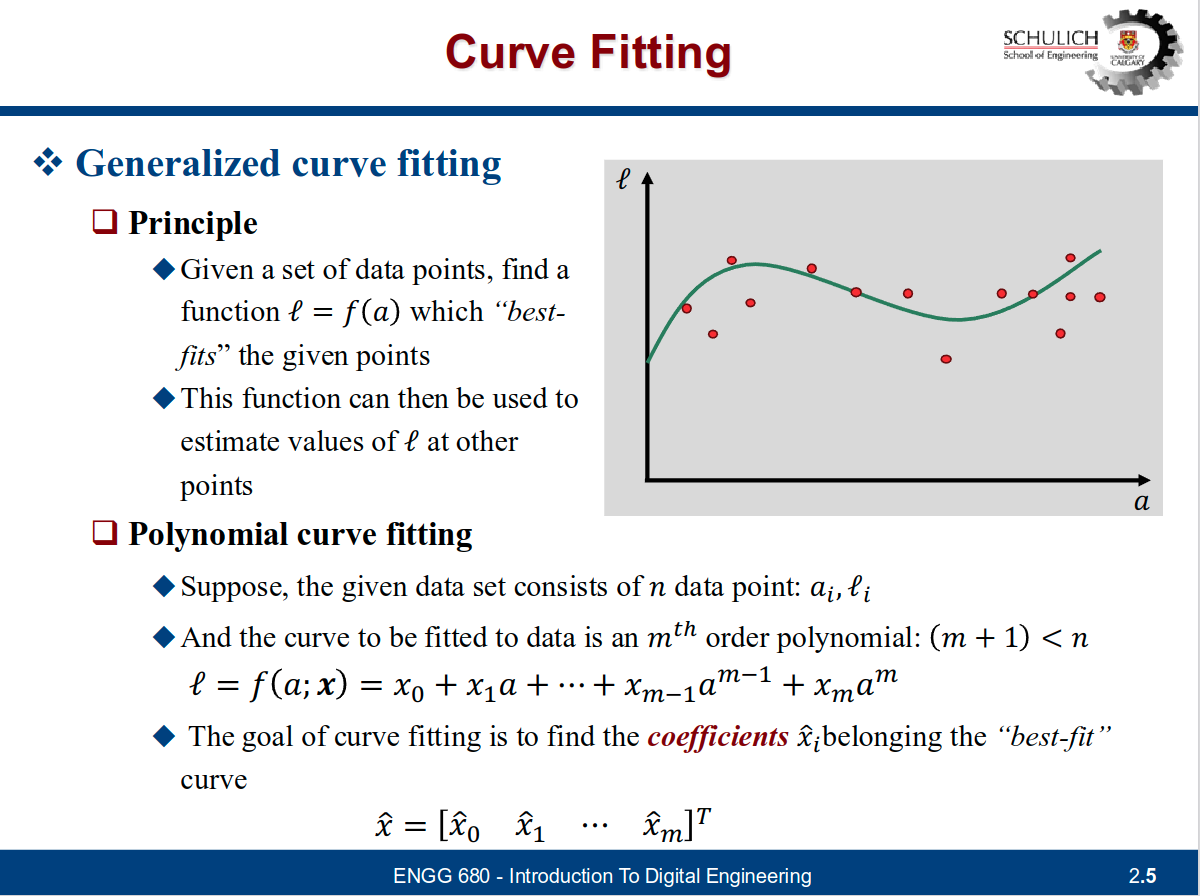

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [1]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('data.xlsx')
arr_data = np.array(df_data)
#print("DataFrame:\n", df_data)
#print("\nNumpy Array:\n", arr_data)

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = np.array(df_data['l'])
l_var = np.array(df_data['l_var'])
l_true = np.array(df_data['l_true'])

# Display the numpy arrays
#print("Noisy Observations (l):\n", l)
#print("\nVariance of Observations (l_var):\n", l_var)
#print("\nTrue Observations (l_true):\n", l_true)

In [ ]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.eye(n)  # Identity matrix of size n, indicating unweighted observations

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


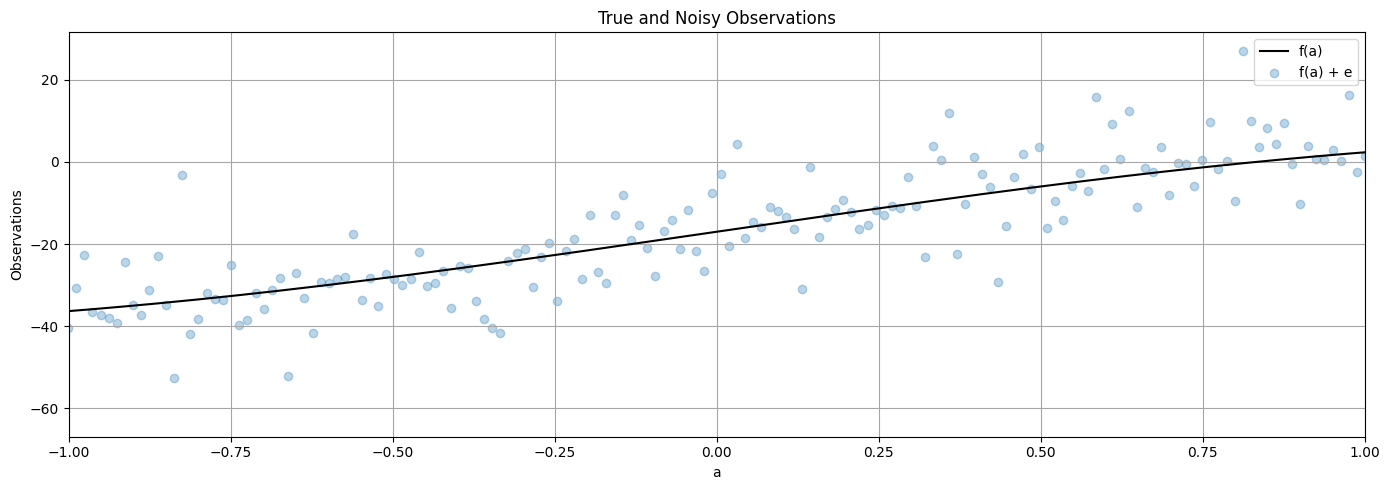

In [ ]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plot the true observations (line plot)
ax.plot(a, l_true, label='f(a)', color='k')  # 'f(a)' with color 'k' (black)

# Plot the noisy observations (scatter plot)
ax.scatter(a, l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)  # Noisy observations with specified color, marker, and transparency

# Add labels, title, and legend
ax.set_xlabel('a')
ax.set_ylabel('Observations')
ax.set_title('True and Noisy Observations')
ax.legend()

# Set the x-axis range to be between -1 and 1
ax.set_xlim([-1, 1])

# Add gridlines
ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

# Show the plot
plt.show()

In [ ]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

    # Step 1: Formulate the design matrix A
    A = np.vander(a, N=deg+1, increasing=True)  # A is the Vandermonde matrix based on input 'a'
    # Step 2: Perform the weighted least squares estimation
    # Compute the normal equations for least squares estimation
    AT_P = A.T @ P  # A^T * P (transposed design matrix times the weight matrix)
    AT_P_A = AT_P @ A  # A^T * P * A (matrix multiplication)
    AT_P_l = AT_P @ l  # A^T * P * l (multiplied by the noisy observations)

    # Step 3: Solve for the polynomial coefficients (x)
    x = np.linalg.inv(AT_P_A) @ AT_P_l  # (A^T * P * A)^(-1) * A^T * P * l

    # Step 4: Calculate the observation residuals (v)
    v = l - A @ x  # Residuals = observed values - predicted values

    # Step 5: Compute the a posteriori variance factor (apv)
    apv = (v.T @ P @ v) / (len(l) - (deg + 1))  # Goodness of fit (scaled by the number of observations and degree)

    # Step 6: Calculate the covariance matrix of the estimated coefficients (cov_x)
    cov_x = apv * np.linalg.inv(AT_P_A)  # Uncertainty in the estimated polynomial coefficients

    # Return the estimated polynomial coefficients, covariance matrix, goodness of fit, and residuals

    return (x, cov_x, apv, v)

In [ ]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
# ...
# Call the fit_polynomial_curve function with polynomial degree 1
deg_1 = 1
x_deg_1, cov_x_deg_1, apv_deg_1, v_deg_1 = fit_polynomial_curve(a, l, P, deg_1)
#print(f"Degree {deg_1} Polynomial Coefficients:\n", x_deg_1)
#print(f"Covariance Matrix for Degree {deg_1}:\n", cov_x_deg_1)
#print(f"A Posteriori Variance Factor for Degree {deg_1}:\n", apv_deg_1)
#print(f"Residuals for Degree {deg_1}:\n", v_deg_1)
#print("\n" + "="*50 + "\n")

# Call the fit_polynomial_curve function with polynomial degree 3
deg_3 = 3
x_deg_3, cov_x_deg_3, apv_deg_3, v_deg_3 = fit_polynomial_curve(a, l, P, deg_3)
#print(f"Degree {deg_3} Polynomial Coefficients:\n", x_deg_3)
#print(f"Covariance Matrix for Degree {deg_3}:\n", cov_x_deg_3)
#print(f"A Posteriori Variance Factor for Degree {deg_3}:\n", apv_deg_3)
#print(f"Residuals for Degree {deg_3}:\n", v_deg_3)
#print("\n" + "="*50 + "\n")

# Call the fit_polynomial_curve function with polynomial degree 5
deg_5 = 5
x_deg_5, cov_x_deg_5, apv_deg_5, v_deg_5 = fit_polynomial_curve(a, l, P, deg_5)
#print(f"Degree {deg_5} Polynomial Coefficients:\n", x_deg_5)
#print(f"Covariance Matrix for Degree {deg_5}:\n", cov_x_deg_5)
#print(f"A Posteriori Variance Factor for Degree {deg_5}:\n", apv_deg_5)
#print(f"Residuals for Degree {deg_5}:\n", v_deg_5)
#print("\n" + "="*50 + "\n")

In [ ]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)


# Construct polynomial functions for each degree using the estimated coefficients and the constants array a

# For the linear polynomial (degree 1)
line_uw = np.polyval(np.flip(x_deg_1), a)  # np.polyval requires coefficients in descending order, so we flip x

# For the cubic polynomial (degree 3)
cubic_uw = np.polyval(np.flip(x_deg_3), a)  # Same flipping for degree 3 coefficients

# For the quintic polynomial (degree 5)
quintic_uw = np.polyval(np.flip(x_deg_5), a)  # Same flipping for degree 5 coefficients

# Display the polynomial values for each degree
#print("Linear Polynomial (degree 1) values:\n", line_uw)
#print("\nCubic Polynomial (degree 3) values:\n", cubic_uw)
#print("\nQuintic Polynomial (degree 5) values:\n", quintic_uw)

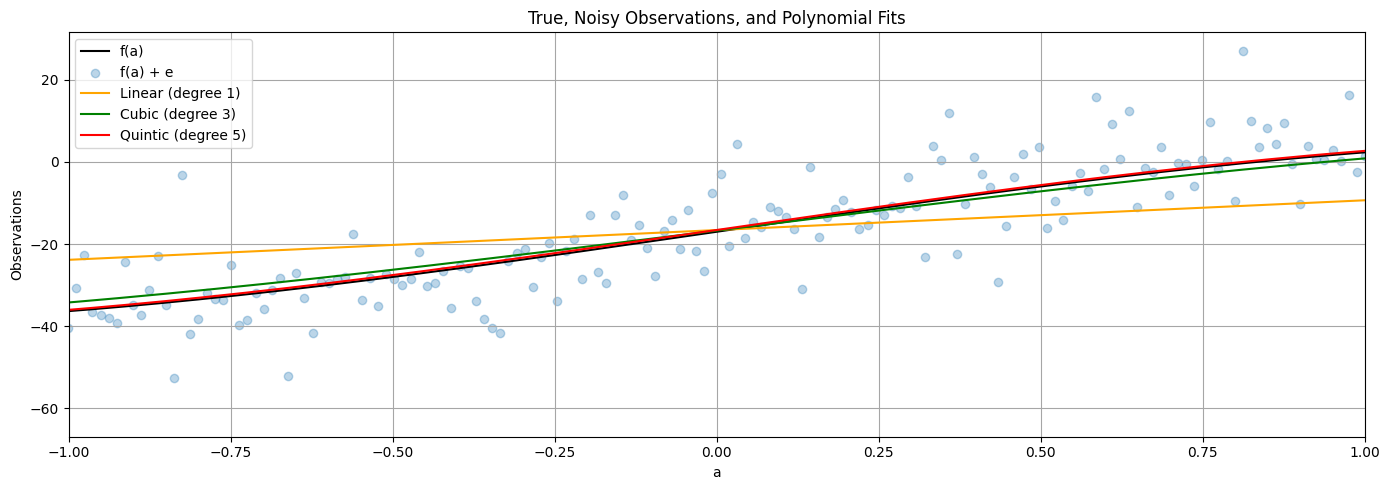

In [ ]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plot the true observations (black line)
ax.plot(a, l_true, label='f(a)', color='k')

# Plot the noisy observations (blue scatter)
ax.scatter(a, l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)

# Plot the linear polynomial (orange line)
ax.plot(a, line_uw, label='Linear (degree 1)', color='orange')

# Plot the cubic polynomial (green line)
ax.plot(a, cubic_uw, label='Cubic (degree 3)', color='green')

# Plot the quintic polynomial (red line)
ax.plot(a, quintic_uw, label='Quintic (degree 5)', color='red')

# Add labels, title, and legend
ax.set_xlabel('a')
ax.set_ylabel('Observations')
ax.set_title('True, Noisy Observations, and Polynomial Fits')
ax.legend()

# Set the x-axis range to -1 to 1
ax.set_xlim([-1, 1])

# Add gridlines
ax.grid(True, which='both',ls='-',color='0.65')

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

In [ ]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
print(f"A Posteriori Variance Factor for Linear Polynomial (degree 1): {apv_deg_1}")
print(f"A Posteriori Variance Factor for Cubic Polynomial (degree 3): {apv_deg_3}")
print(f"A Posteriori Variance Factor for Quintic Polynomial (degree 5): {apv_deg_5}")

A Posteriori Variance Factor for Linear Polynomial (degree 1): 162.742608604322
A Posteriori Variance Factor for Cubic Polynomial (degree 3): 66.13227783131883
A Posteriori Variance Factor for Quintic Polynomial (degree 5): 63.758344630184176


In [ ]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
# Compute the norm between predicted observations and true observations for each polynomial
norm_deg_1 = np.linalg.norm(line_uw - l_true)  # Norm for the linear polynomial
norm_deg_3 = np.linalg.norm(cubic_uw - l_true)  # Norm for the cubic polynomial
norm_deg_5 = np.linalg.norm(quintic_uw - l_true)  # Norm for the quintic polynomial

# Print the computed norms
print(f"Norm between Linear Polynomial (degree 1) and True Observations: {norm_deg_1}")
print(f"Norm between Cubic Polynomial (degree 3) and True Observations: {norm_deg_3}")
print(f"Norm between Quintic Polynomial (degree 5) and True Observations: {norm_deg_5}")

Norm between Linear Polynomial (degree 1) and True Observations: 229.06016796744092
Norm between Cubic Polynomial (degree 3) and True Observations: 38.285979929116635
Norm between Quintic Polynomial (degree 5) and True Observations: 17.36996719696425


In [ ]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# The a posteriori Variance factor and the norm between the predicted observations and true observations
# indicate how well each polynomial fits the data.
# The a posteriori Variance facto reflects the goodness of fit, where a lower APV indicates a better fit
# of the model to the data.
# Linear Polynomial has the highest a posteriori Variance factor which shows that this type of polynomial
# does not fit the data well. a posteriori Variance of the Cubic Polynomial has decreased significantly
# which shows the data is of non linear nature. Quintic Polynomial has the lowest a posteriori Variance factor
# which shows this model fits the data the best

# The norm measures the distance between the predicted observations and the true observations.
# A lower norm indicates that the predicted values are closer to the true values.
# Linear Polynomial: This will have the highest norm, indicating a less accurate
# fit to the true data.
# Cubic Polynomia: The norm will decrease as the cubic polynomial provides a closer
# fit to the true observations compared to the linear model.
# Quintic Polynomial: This will have the lowest norm, suggesting the closest match
# to the true observations.


In [ ]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(1 / l_var)  # Inverse of variance on the diagonal of the matrix
# Display the weight matrix P
#print("Weight Matrix P:\n", P)

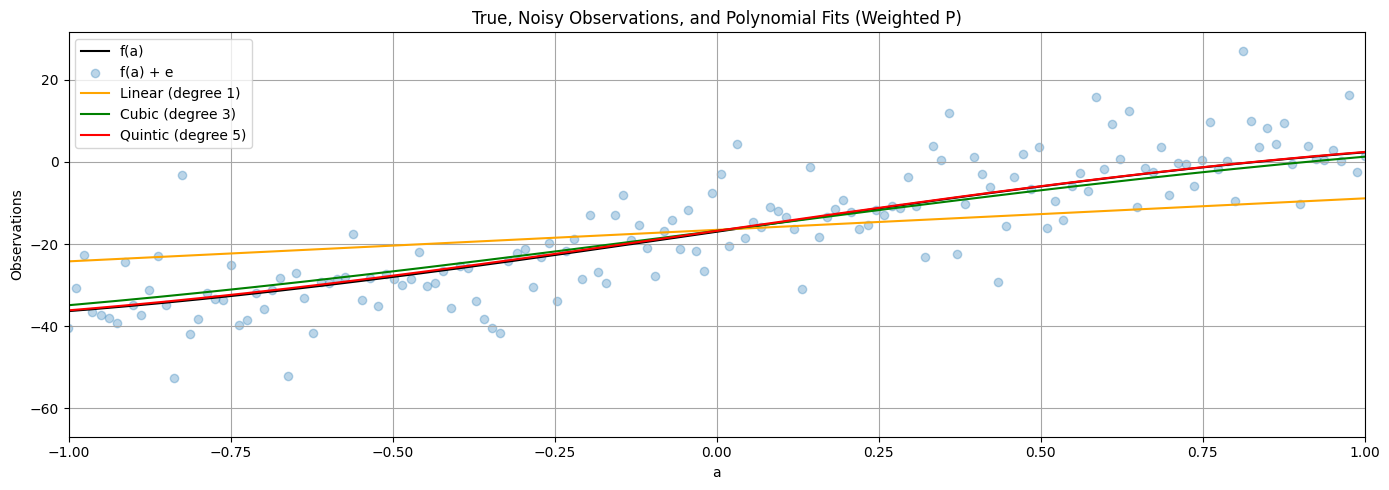

A Posteriori Variance Factor for Linear Polynomial (degree 1): 12.054651233436907
A Posteriori Variance Factor for Cubic Polynomial (degree 3): 1.1444647026537131
A Posteriori Variance Factor for Quintic Polynomial (degree 5): 0.944700904385655
Norm between Linear Polynomial (degree 1) and True Observations: 230.67760813832942
Norm between Cubic Polynomial (degree 3) and True Observations: 36.07026687266801
Norm between Quintic Polynomial (degree 5) and True Observations: 5.741606915885327


In [ ]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# ==============================================================================
# Step 6 - Recalculate polynomial fits using the proper P matrix

# Call the fit_polynomial_curve function with polynomial degree 1
x_deg_1, cov_x_deg_1, apv_deg_1, v_deg_1 = fit_polynomial_curve(a, l, P, 1)

# Call the fit_polynomial_curve function with polynomial degree 3
x_deg_3, cov_x_deg_3, apv_deg_3, v_deg_3 = fit_polynomial_curve(a, l, P, 3)

# Call the fit_polynomial_curve function with polynomial degree 5
x_deg_5, cov_x_deg_5, apv_deg_5, v_deg_5 = fit_polynomial_curve(a, l, P, 5)

# Step 7 - Construct the polynomial functions with the updated coefficients

# For the linear polynomial (degree 1)
line_uw = np.polyval(np.flip(x_deg_1), a)

# For the cubic polynomial (degree 3)
cubic_uw = np.polyval(np.flip(x_deg_3), a)

# For the quintic polynomial (degree 5)
quintic_uw = np.polyval(np.flip(x_deg_5), a)

# Step 8 - Plot the results

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plot the true observations (black line)
ax.plot(a, l_true, label='f(a)', color='k')

# Plot the noisy observations (blue scatter)
ax.scatter(a, l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)

# Plot the linear polynomial (orange line)
ax.plot(a, line_uw, label='Linear (degree 1)', color='orange')

# Plot the cubic polynomial (green line)
ax.plot(a, cubic_uw, label='Cubic (degree 3)', color='green')

# Plot the quintic polynomial (red line)
ax.plot(a, quintic_uw, label='Quintic (degree 5)', color='red')

# Add labels, title, and legend
ax.set_xlabel('a')
ax.set_ylabel('Observations')
ax.set_title('True, Noisy Observations, and Polynomial Fits (Weighted P)')
ax.legend()

# Set the x-axis range to -1 to 1
ax.set_xlim([-1, 1])

# Add gridlines
ax.grid(True, which='both', ls='-', color='0.65')

# Adjust layout and display the plot
fig.tight_layout()
plt.show()

# Step 9 - Print the a posteriori variance factor for each polynomial

print(f"A Posteriori Variance Factor for Linear Polynomial (degree 1): {apv_deg_1}")
print(f"A Posteriori Variance Factor for Cubic Polynomial (degree 3): {apv_deg_3}")
print(f"A Posteriori Variance Factor for Quintic Polynomial (degree 5): {apv_deg_5}")

# Step 10 - Compute the norm between the predicted and true observations

norm_deg_1 = np.linalg.norm(line_uw - l_true)
norm_deg_3 = np.linalg.norm(cubic_uw - l_true)
norm_deg_5 = np.linalg.norm(quintic_uw - l_true)

# Print the computed norms
print(f"Norm between Linear Polynomial (degree 1) and True Observations: {norm_deg_1}")
print(f"Norm between Cubic Polynomial (degree 3) and True Observations: {norm_deg_3}")
print(f"Norm between Quintic Polynomial (degree 5) and True Observations: {norm_deg_5}")


In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# In unweighted LSE, all observations (both reliable and noisy) are treated equally. This leads to higher A Posteriori Variance Factor (APV) and norms, as the model tries to fit both the noise and the true data. The fit can be less accurate because the noisy data influences the model significantly.
# In weighted LSE, observations with lower variance (more reliable data) are given more weight, while noisy observations (with higher variance) are down-weighted. This results in a better fit to the true data, reflected by lower APV and norms. The model focuses more on the reliable data, reducing the influence of noise.
#Overall, weighted LSE provides a more accurate fit by accounting for the reliability of the data, leading to a more robust model that better represents the true observations.

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

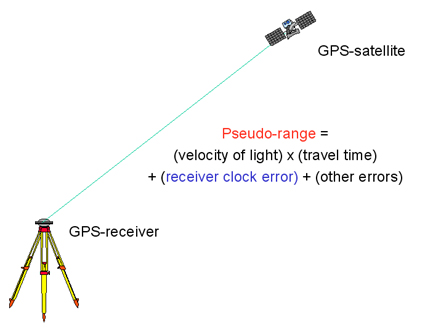

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [36]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel('pseudoranges.xlsx') # Load the pseudorange measurements file into a dataframe
df_sat_pos = pd.read_excel('satellite_position.xlsx') # Load the satellites' positions file into a dataframe

pseudorange = df_pseudorange['P'].values  # Extract pseudorange measurements
sat_pos = df_sat_pos[['x', 'y', 'z']].values  # Extract satellite positions (x, y, z)
#pseudorange = np.array(df_pseudorange)
#sat_pos = np.array(df_sat_pos)
#print("Pseudorange Measurements (numpy array):\n", pseudorange)
#print("\nSatellite Positions (numpy array):\n", sat_pos)

In [37]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = len(pseudorange)
m = 3
#print("n:", n)
#print("m:", m)

In [38]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.eye(n)

In [39]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)

In [40]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [41]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)  # A ones vector of length m (number of states)
i = 0  # Starting iteration count
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [42]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):

    # Compute the Euclidean distance between receiver and each satellite
    distance = np.linalg.norm(satellite_pos - receiver_pos, axis=1)
    return distance


In [43]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
    # Compute the differences between satellite positions and receiver position
    diff = s_pos - r_pos
    A = diff / rho[:, np.newaxis]
    return A

In [44]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)
from scipy.optimize import least_squares
tolerance = 0.001  # Corrections less than 0.1 m for x, y, z part of receiver's position
max_iterations = 1000  # Maximum iterations to avoid infinite loops

while np.linalg.norm(delta[:3]) > tolerance:  # Convergence criteria based on corrections for x, y, z part

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = euclidean_norm(x_hat, sat_pos)

       # compute the design matrix A
       # (1 marks)
       A = design_matrix(x_hat, sat_pos, rho)

       # compute the misclosure array w
       # (1 marks)
       w = pseudorange  - rho

       # Solve the nonlinear least squares problem using scipy's least_squares solver
       def objective_function(x_hat, pseudorange, sat_pos):
          predicted_distances = euclidean_norm(x_hat, sat_pos)
          residuals = pseudorange - predicted_distances
          return residuals

       result = least_squares(objective_function, x_hat, args=(pseudorange, sat_pos))

       # compute the corrections delta
       # (1 marks)
       delta = result.x - x_hat  # Calculate the change in position

       # update the states
       # (1 marks)
       x_hat = result.x  # Update the estimated receiver state


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)
       i += 1

       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w.append(w)
       arr_delta.append(delta)
       arr_err_pos.append(err_pos)
       arr_i.append(i)




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = (w.T @ P @ w) / (n - m)  # A Posteriori Variance Factor

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = apv * np.linalg.pinv(A.T @ P @ A)  # Covariance matrix for the estimated states

print(f"Converged after {i} iterations.")
print(f"Final Estimated States (x_hat):\n{x_hat}")
print(f"A Posteriori Variance Factor (APV): {apv}")
print(f"Covariance Matrix of Estimated States (C_x_hat):\n{C_x_hat}")


Converged after 2 iterations.
Final Estimated States (x_hat):
[-1633491.7682247  -3651626.13394264  4952475.21438704]
A Posteriori Variance Factor (APV): 8.262379189752302
Covariance Matrix of Estimated States (C_x_hat):
[[2.57798542 0.25763197 0.25441942]
 [0.25763197 1.91297368 0.00291461]
 [0.25441942 0.00291461 2.49954465]]


In [45]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
print(f"Estimated States (x_hat):\n{x_hat}")
print(f"Corrections Array (delta):\n{arr_delta[-1]}")  # The last correction applied
print(f"Estimated Measurement Residuals (w):\n{arr_w[-1]}")  # The final misclosure
print(f"A Posteriori Variance of Unit Weight (APV): {apv}")
print(f"Covariance Matrix of Estimated States (C_x_hat):\n{C_x_hat}")
print(f"Number of Iterations: {i}")
print(f"3-D Position Errors (in meters): {arr_err_pos[-1]}")

# (7 marks)



Estimated States (x_hat):
[-1633491.7682247  -3651626.13394264  4952475.21438704]
Corrections Array (delta):
[-2.52388418e-07 -2.42143869e-08  8.47503543e-08]
Estimated Measurement Residuals (w):
[ 3.82175406e+00 -1.66028552e+00  4.29357108e-01  1.56435963e-01
  3.61111931e+00  1.24503509e+00 -2.51495093e-03  2.20369567e+00
  8.90101790e-02  3.48029520e+00 -4.11836233e+00]
A Posteriori Variance of Unit Weight (APV): 8.262379189752302
Covariance Matrix of Estimated States (C_x_hat):
[[2.57798542 0.25763197 0.25441942]
 [0.25763197 1.91297368 0.00291461]
 [0.25441942 0.00291461 2.49954465]]
Number of Iterations: 2
3-D Position Errors (in meters): 6.91597723629458


In [46]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)
# 1- A Posteriori Variance of Unit Weight (APV):

    #  The APV indicates the goodness of fit of the Least Squares solution. A value close to 1 means the model fits the observations well, assuming the observation variances are correct.
    # If APV > 1, it suggests that the residuals (errors) are larger than expected, implying that the model might not be capturing all the variation in the data, or that the observation errors are underestimated.
    # If APV < 1, it suggests that the model fits the data better than expected, or the observation errors are overestimated.

# Covariance Matrix of Estimated States:

    # The Covariance Matrix provides a measure of the uncertainty in the estimated receiver position (x, y, z).
    # Smaller diagonal elements in the covariance matrix indicate higher confidence in the corresponding state estimates (x, y, z).
    # Off-diagonal elements close to zero indicate that the state estimates are relatively uncorrelated, which is desirable for stability in the estimation process.

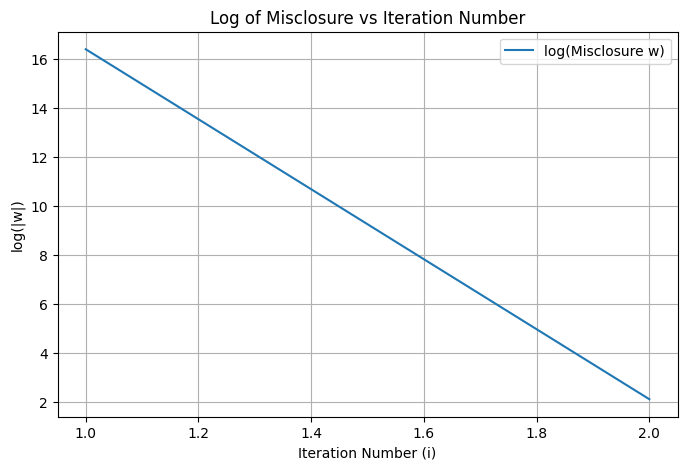

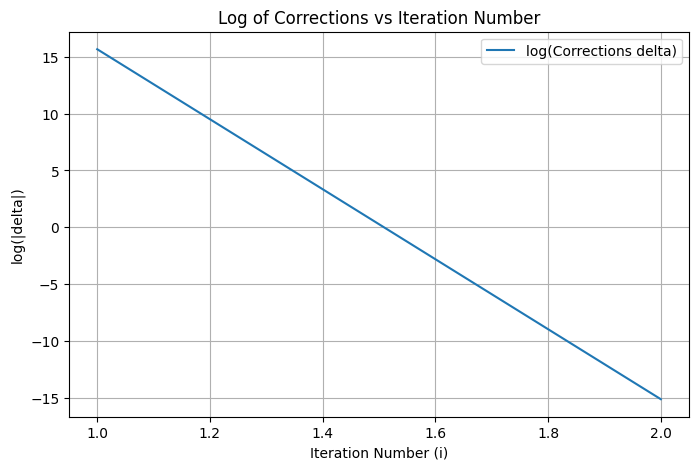

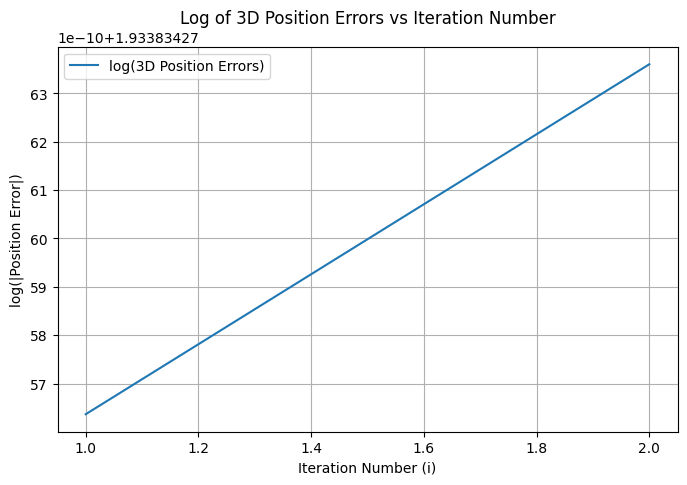

In [47]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(8, 5))
plt.plot(arr_i, np.log([np.linalg.norm(w) for w in arr_w]), label='log(Misclosure w)')
plt.xlabel('Iteration Number (i)')
plt.ylabel('log(|w|)')
plt.title('Log of Misclosure vs Iteration Number')
plt.grid(True)
plt.legend()
plt.show()

# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(8, 5))
plt.plot(arr_i, np.log([np.linalg.norm(delta) for delta in arr_delta]), label='log(Corrections delta)')
plt.xlabel('Iteration Number (i)')
plt.ylabel('log(|delta|)')
plt.title('Log of Corrections vs Iteration Number')
plt.grid(True)
plt.legend()
plt.show()

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(8, 5))
plt.plot(arr_i, np.log(arr_err_pos), label='log(3D Position Errors)')
plt.xlabel('Iteration Number (i)')
plt.ylabel('log(|Position Error|)')
plt.title('Log of 3D Position Errors vs Iteration Number')
plt.grid(True)
plt.legend()
plt.show()

In [48]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)
# 1- Misclosure ww vs Iteration: The misclosure decreases with each iteration, indicating that the differences between the observed and predicted pseudoranges are getting smaller as the solution converges.
# 2- Corrections δδ vs Iteration: The corrections applied to the receiver's position decrease over time, showing that the position estimate is improving. Large corrections are made initially, and smaller ones as the estimate converges.
# 3- 3D Position Errors vs Iteration: The 3D position errors decrease steadily, indicating that the estimated position is approaching the true receiver position with each iteration.

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
